In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [2]:
#show the first raining example
print(f"Training Sample:\n{train_data[0].shape}\n")
print(f"Training labels:\n{train_labels[0]}\n")

Training Sample:
(28, 28)

Training labels:
9



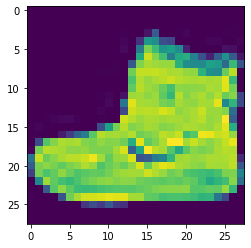

In [3]:
# Visualizing the data
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [4]:
class_names =['Tshirt', "Trouser","Pullovr","Dress","Coat","Sandal",
              "shirt","Sneaker","bag","boot"]

In [5]:
len(class_names)

10

Text(0.5, 1.0, 'Tshirt')

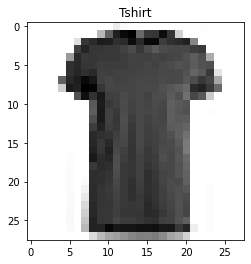

In [6]:
plt.imshow(train_data[17],cmap= plt.cm.binary)
plt.title(class_names[train_labels[17]])

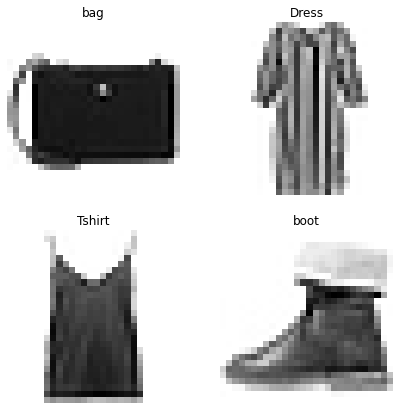

In [7]:
import random
plt.figure(figsize = (7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  ran = random.choice(range(len(train_data)))
  plt.imshow(train_data[ran], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[ran]])
  plt.axis(False)

In [8]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
                             tf.keras.layers.InputLayer(input_shape=(28,28,1,)),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(516, activation = 'relu'),
                             tf.keras.layers.Dense(264, activation='relu'),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model.compile(loss = tf.keras.losses.categorical_crossentropy,
              optimizer = tf.keras.optimizers.Adam(0.001),
              metrics = ['Accuracy'])
history = model.fit(train_data,tf.one_hot(train_labels, depth =10), epochs=10, validation_data=(test_data, tf.one_hot(test_labels,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 1.6282 - accuracy: 0.0343 - val_loss: 0.5170 - val_accuracy: 0.0127
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4695 - accuracy: 0.0076 - val_loss: 0.5018 - val_accuracy: 0.0064
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4266 - accuracy: 0.0097 - val_loss: 0.4886 - val_accuracy: 0.0059
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4076 - accuracy: 0.0108 - val_loss: 0.4712 - val_accuracy: 0.0079
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3816 - accuracy: 0.0189 - val_loss: 0.4096 - val_accuracy: 0.0160
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3645 - accuracy: 0.0273 - val_loss: 0.4491 - val_accuracy: 0.0299
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3513 - accuracy: 0.0387 - val_loss: 0.3897 - val_ac

In [9]:
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

In [11]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(12, activation = 'relu'),
                             tf.keras.layers.Dense(24, activation='relu'),
                             tf.keras.layers.Dense(12, activation='relu'),
                             tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model.compile(loss = tf.keras.losses.categorical_crossentropy,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['Accuracy'])
history_norm = model.fit(train_data_norm,tf.one_hot(train_labels, depth =10), epochs=10, validation_data=(test_data_norm, tf.one_hot(test_labels,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6921 - accuracy: 0.0000e+00 - val_loss: 0.5094 - val_accuracy: 2.0000e-05
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4724 - accuracy: 1.3333e-05 - val_loss: 0.5284 - val_accuracy: 1.2000e-04
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4295 - accuracy: 7.1667e-05 - val_loss: 0.4592 - val_accuracy: 1.0000e-05
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4039 - accuracy: 8.0000e-05 - val_loss: 0.4500 - val_accuracy: 1.6000e-04
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3869 - accuracy: 6.3333e-05 - val_loss: 0.4432 - val_accuracy: 2.0000e-05
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3737 - accuracy: 4.0000e-05 - val_loss: 0.4376 - val_accuracy: 3.0000e-05
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3638 - acc

In [15]:
tf.random.set_seed(42)

model_1 =tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(28,28)),
                              tf.keras.layers.Dense(4, activation='relu'),
                              tf.keras.layers.Dense(4, activation='relu'),
                              tf.keras.layers.Dense(10, activation='softmax')
])
model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

history_lr = model_1.fit(train_data_norm,train_labels,
                         epochs=40,
                         validation_data=(test_data_norm, test_labels),
                         callbacks = [lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - val_accuracy:

Text(0, 0.5, 'Loss')

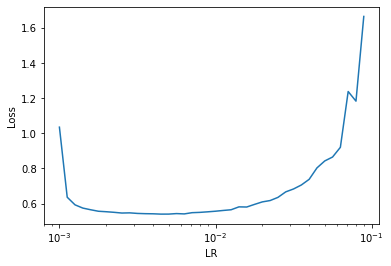

In [17]:
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs,history_lr.history['loss'])
plt.xlabel("LR")
plt.ylabel("Loss")

In [27]:
# LEts refit the model with ideal LR
tf.random.set_seed(42)

model_final = tf.keras.Sequential([
                                   tf.keras.layers.Flatten(input_shape=(28,28)),
                                   tf.keras.layers.Dense(4, activation='relu'),
                                   tf.keras.layers.Dense(4, activation='relu'),
                                   tf.keras.layers.Dense(10, activation='softmax')
])

model_final.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                    optimizer= tf.keras.optimizers.Adam(0.001),
                    metrics = ['accuracy'])

history_final = model_final.fit(train_data_norm,
                                train_labels,
                                epochs=40,
                                validation_data=(test_data_norm, test_labels),
                                verbose =1)

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

In [21]:
### Evaluating the model

In [24]:
from sklearn.metrics import confusion_matrix

In [32]:
 y_pred= model_final.predict(test_data_norm)

In [33]:
y_pred.shape

(10000, 10)

In [37]:
y_pred_lab = tf.argmax(y_pred,axis = 1)

In [38]:
confusion_matrix(y_true=test_labels, y_pred=y_pred_lab)

array([[833,  13,  11,  54,   3,   2,  73,   0,  11,   0],
       [  6, 950,   1,  26,   5,   1,  11,   0,   0,   0],
       [ 42,   1, 593,   8, 164,   1, 178,   0,  13,   0],
       [ 74,  27,  10, 787,  35,   1,  56,   2,   8,   0],
       [  2,   1,  83,  29, 728,   0, 150,   0,   7,   0],
       [  0,   1,   0,   0,   0, 941,   0,  34,   3,  21],
       [217,   9, 117,  34,  98,   3, 505,   0,  17,   0],
       [  0,   0,   0,   0,   0,  70,   0, 905,   0,  25],
       [ 16,   1,  32,  19,   5,   9,   8,   5, 905,   0],
       [  0,   0,   0,   0,   1,  36,   0,  48,   5, 910]])

In [51]:
import random

def plot_random_image(model, images, true_label, classes):
  '''
  Picks a random image , plots it and labels it with a prediction and truth label
  '''
  i = random.randint(0, len(images))
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_labels = classes[pred_probs.argmax()]
  true_label = classes[true_label[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)

  if pred_labels==true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel("Pred: {} {:2.0f}% (True: {})". format(pred_labels,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)
  

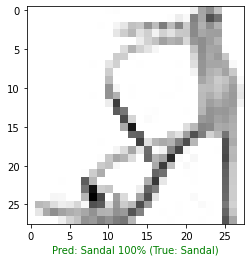

In [52]:
plot_random_image(model=model_final,
                  images= test_data_norm,
                  true_label=test_labels,
                  classes=class_names)

In [53]:
## What patterns is our model learning?

In [54]:
model_final.layers

In [55]:
model_final.layers[1]

In [56]:
# Getting patterns of a lyer in our model
wts,bias = model_final.layers[1].get_weights()

wts, wts.shape

(array([[ 1.5936174 , -0.76976854, -1.5807068 , -1.9991511 ],
        [ 0.45609504, -1.2976133 , -0.7302893 , -0.16224061],
        [ 1.348038  , -0.19881976, -1.9888442 , -1.2137522 ],
        ...,
        [-0.22335076,  0.59402996, -0.272626  ,  0.4604269 ],
        [-0.21883878,  1.1971763 ,  0.5428994 , -0.5791032 ],
        [ 0.37653425, -0.19791599,  0.02285609,  0.24255323]],
       dtype=float32), (784, 4))